### Ishaan Mehta E18CSE069 EB02 LabWeek5

In [1]:
from skimage import data
import matplotlib.pyplot as plt
from skimage.transform import warp
from skimage import data
from skimage.transform import SimilarityTransform
import numpy as np
import math

(512, 512)

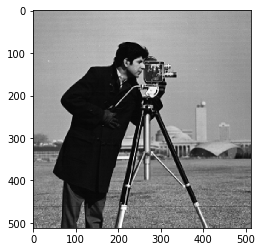

In [2]:
image = data.camera()
plt.imshow(image, cmap="gray")
image.shape

In [3]:
#defining translation parameters
bx, by = 30,-10

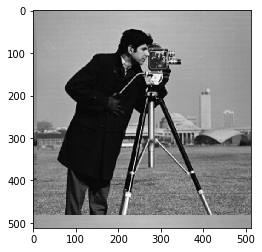

In [4]:
imageShifted = np.zeros(image.shape)
for i in range(len(image)):
    newX = i+bx
    if newX >= len(image):
        newX -= len(image)
    for j in range(len(image)):
        newY = j+by
        if newY >= len(image):
            newY -= len(image)
        imageShifted[i,j] = image[newX, newY]
plt.imshow(imageShifted, cmap='gray')

#### Translation

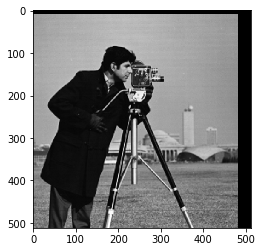

In [5]:
plt.imshow(warp(image, SimilarityTransform(scale=1,translation=(bx,by))), cmap='gray')

#### Scale

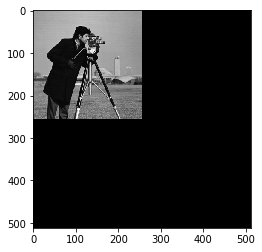

In [6]:
plt.imshow(warp(image, SimilarityTransform(scale=2)), cmap="gray")

#### Rotate

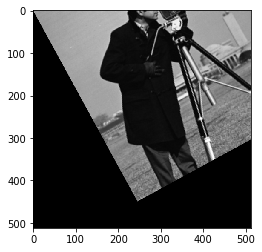

In [7]:
plt.imshow(warp(image, SimilarityTransform(rotation=0.5, scale=1)), cmap='gray')

#### Horizontal and Vertical Shear

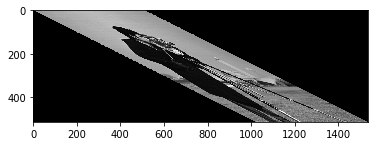

In [9]:
shear_factor = 2
trans = np.array([[1, shear_factor],[0, 1]])

new_img = np.zeros((image.shape[0], image.shape[1]+shear_factor*image.shape[0]), np.uint8)

for i in range(len(image)):
    for j in range(len(image[0])):
        new_img[i, j+i*shear_factor] = image[i,j]
plt.imshow(new_img, cmap='gray')

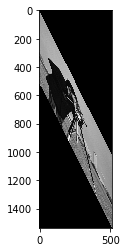

In [10]:
hear_factor = 2
trans = np.array([[1, shear_factor],[0, 1]])

new_img = np.zeros((image.shape[0]+shear_factor*image.shape[0], image.shape[1]), np.uint8)

for i in range(len(image)):
    for j in range(len(image[0])):
        new_img[i+j*shear_factor, j] = image[i,j]
plt.imshow(new_img, cmap='gray')

In [11]:
#function to add noise
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    import random
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output
img_noised = sp_noise(image, 0.10)

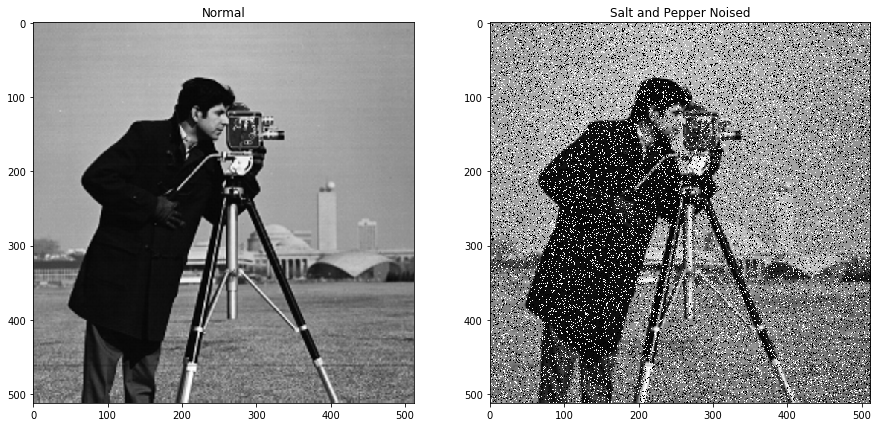

In [12]:
plt.figure(1, figsize=(15,10))
plt.subplot(121)
plt.title('Normal')
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.title('Salt and Pepper Noised')
plt.imshow(img_noised, cmap='gray')

#### Median and Mean Denoising

In [13]:
h, w = img_noised.shape
img_denoised_median = np.zeros((h,w))
img_denoised_mean = np.zeros((h,w))
for i in range(1,h-1):
    for j in range(1,w-1):
        sample = np.array(
            [
                img_noised[i-1, j-1], 
               img_noised[i-1, j], 
               img_noised[i-1, j + 1], 
               img_noised[i, j-1], 
               img_noised[i, j], 
               img_noised[i, j + 1], 
               img_noised[i + 1, j-1], 
               img_noised[i + 1, j], 
               img_noised[i + 1, j + 1]
            ]
        )
        median = np.median(sample)
        mean = np.mean(sample)
        img_denoised_median[i,j] = median
        img_denoised_mean[i,j] = mean

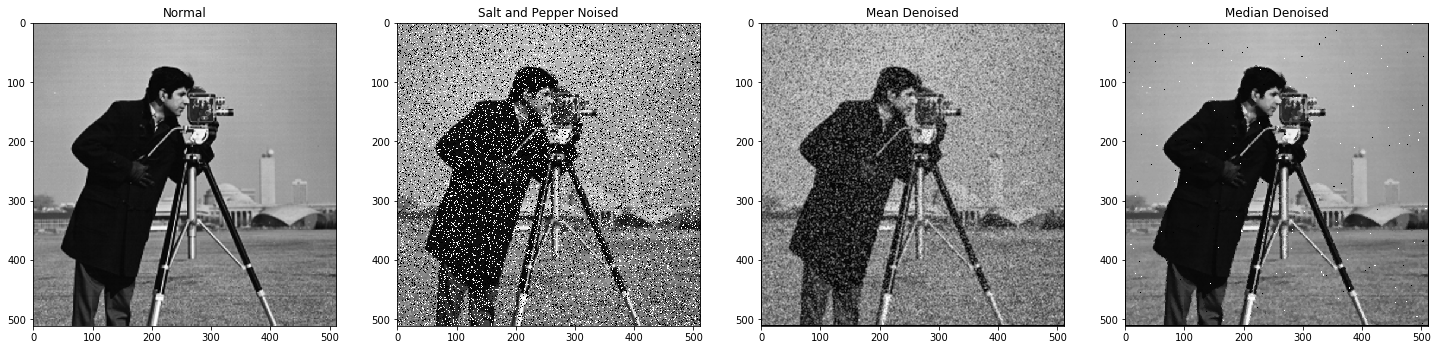

In [14]:
plt.figure(1, figsize=(25,20))
plt.subplot(141)
plt.title('Normal')
plt.imshow(image, cmap='gray')
plt.subplot(142)
plt.title('Salt and Pepper Noised')
plt.imshow(img_noised, cmap='gray')
plt.subplot(143)
plt.title('Mean Denoised')
plt.imshow(img_denoised_mean, cmap='gray')
plt.subplot(144)
plt.title('Median Denoised')
plt.imshow(img_denoised_median, cmap='gray')